# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [3]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data
training_file = "traffic-signs-data/train.p"
testing_file = "traffic-signs-data/train.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [4]:
### Replace each question mark with the appropriate value.
import numpy as np

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 39209
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

Distribution of training and testing datasets are shown separately
For label index please refer to signname.csv file


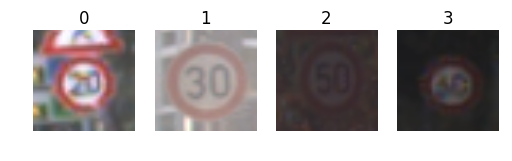

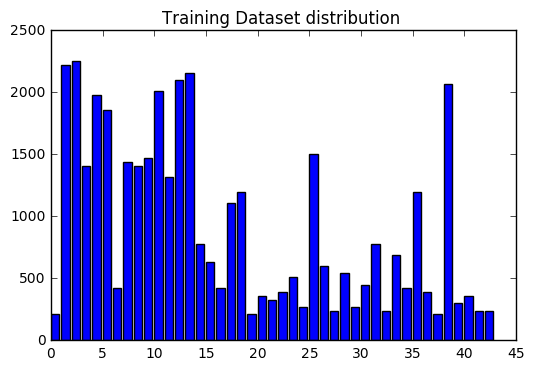

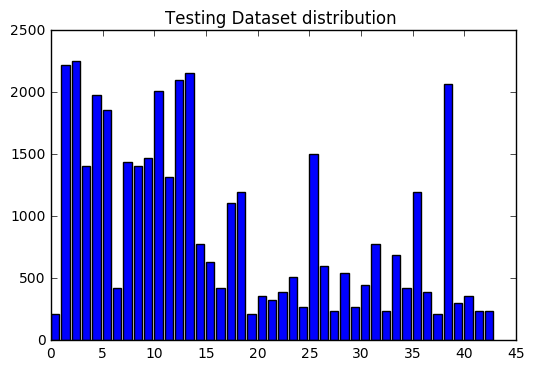

In [19]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import cv2
from collections import Counter
# Visualizations will be shown in the notebook.
%matplotlib inline

u,index=np.unique(y_train,return_index=True)

fig1 = plt.figure()
for i in range(0,4):
    image = X_train[index[i]].squeeze()
    a=fig1.add_subplot(1,4,i+1)
    plt.imshow(image)
    a.set_title(str(y_train[index[i]]))
    a.axis('off')
    
training_label_value=Counter(y_train)
testing_label_value=Counter(y_test)

training_label=training_label_value.keys()
training_value=training_label_value.values()

testing_label=testing_label_value.keys()
testing_value=testing_label_value.values()

print('Distribution of training and testing datasets are shown separately')
print('For label index please refer to signname.csv file')

fig2 = plt.figure()
plt.bar(training_label,training_value)
plt.title("Training Dataset distribution ")

fig3 = plt.figure()
plt.bar(testing_label,testing_value)
plt.title("Testing Dataset distribution ")


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [4]:
### Preprocess the data here.
import random
import math

### Converting to YUV and Choosing only the Y component for training and testing
X_traing=[]
for i in range(len(X_train)):
    yuv=cv2.cvtColor(X_train[i], cv2.COLOR_RGB2YUV)
    temp=yuv[:,:,0]
    X_traing.append(temp[:,:,np.newaxis])
    
X_testg=[]
for i in range(len(X_test)):
    yuv=cv2.cvtColor(X_test[i], cv2.COLOR_RGB2YUV)
    temp=yuv[:,:,0]
    X_testg.append(temp[:,:,np.newaxis])

X_train=np.asarray(X_traing)
X_test=np.asarray(X_testg)

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:** The data was converted from RGB color channel to YUV channel.According to "Traffic Sign Recognition with Multi-Scale Convolutional Networks" by Pierre Sermanet and Yann LeCun all the three channels can be used and we can have Multi-Scale Convolution Networks or we can use 'Y' (which is the most sensitive and contains more information) with single layer of Convolution Networks. I chose the second option i.e. 'Y' channel with Single layer of convolution network

In [5]:
### Generate additional data (OPTIONAL!)
from operator import itemgetter
from collections import Counter

rep=Counter(y_train)
[(max_label,max_num)]=Counter(y_train).most_common(1)
X_additional=[]
y_additional=[]

def random_append(label,num_samples):
    diff=max_num-num_samples
    indices = [i for i, x in enumerate(y_train) if x == label]
    X_temp=itemgetter(*indices)(X_train)
    if len(X_temp)!=num_samples:
        raise ValueError('Error Reset the kernel and run again caused due to inequal samples')
        
    rows,cols,ch = X_temp[0].shape
    
    if diff==num_samples:
        for j in range(0,diff):
            ang=random.randint(-15, 15)
            M = cv2.getRotationMatrix2D((cols/2,rows/2),ang,1)
            dst = cv2.warpAffine(X_temp[j],M,(cols,rows))
            M = np.float32([[1,0,random.randint(-2, 2)],[0,1,random.randint(-2, 2)]])
            dst = cv2.warpAffine(dst,M,(cols,rows))
            X_additional.append(dst[:,:,np.newaxis])
            y_additional.append(label)
            

    if diff<num_samples:
        idx=random.sample(range(0, num_samples), diff)
        for k in range(0,diff):
            ang=random.randint(-15, 15)
            M = cv2.getRotationMatrix2D((cols/2,rows/2),ang,1)
            dst = cv2.warpAffine(X_temp[idx[k]],M,(cols,rows))
            M = np.float32([[1,0,random.randint(-2, 2)],[0,1,random.randint(-2, 2)]])
            dst = cv2.warpAffine(dst,M,(cols,rows))
            X_additional.append(dst[:,:,np.newaxis])
            y_additional.append(label)

    if diff>num_samples:
        rge=math.floor(diff/num_samples)
        for l in range(0,rge):
            for m in range(0,num_samples):
                ang=random.randint(-15, 15)
                M = cv2.getRotationMatrix2D((cols/2,rows/2),ang,1)
                dst = cv2.warpAffine(X_temp[m],M,(cols,rows))
                M = np.float32([[1,0,random.randint(-2, 2)],[0,1,random.randint(-2, 2)]])
                dst = cv2.warpAffine(dst,M,(cols,rows))
                X_additional.append(dst[:,:,np.newaxis])
                y_additional.append(label)
        diff=max_num-(num_samples*(1+rge))
        if diff==0:
            return
        idx=random.sample(range(0,num_samples), diff)
        for n in range(0,diff):
            ang=random.randint(-15, 15)
            M = cv2.getRotationMatrix2D((cols/2,rows/2),ang,1)
            dst = cv2.warpAffine(X_temp[idx[n]],M,(cols,rows))
            M = np.float32([[1,0,random.randint(-2, 2)],[0,1,random.randint(-2, 2)]])
            dst = cv2.warpAffine(dst,M,(cols,rows))
            X_additional.append(dst[:,:,np.newaxis])
            y_additional.append(label)
            
    return

for o in range(0,43):
    if rep[o]<max_num:
        random_append(o,rep[o])


for i in range(0,len(X_train)):
    X_additional.append(X_train[i])
    y_additional.append(y_train[i])

X_train=np.asarray(X_additional)
y_train=np.asarray(y_additional)


if len(X_train)!=(max_num*43):
    raise ValueError('Error Reset the kernel and run from begining.There is a bug with random_append function')

### and split the data into training/validation/testing sets here.
### 20 percent as thumb rule
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
X_train,X_validation,y_train,y_validation=train_test_split(X_train,y_train,test_size=0.2,random_state=0)
X_train, y_train = shuffle(X_train, y_train)

print("Number of training examples =", len(X_train))
print("Number of Validation examples=",len(X_validation))

Number of training examples = 77400
Number of Validation examples= 19350


### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:** 
Testing,Validation and testing Data: The dataset ,when provided,was divided into Training and Testing Data. So Testing Data was not mixed and was kept for testing the model at the end. However Training Data was divided into Testing and Validation data based on the thumb rule explained in the lecture,20% for validation, which can give a near figure to actual accuracy.

1) Additional Data Generated:Yes, additional Data was generated.It was generated using the existing training data samples by principle of oversampling but with slight changes to images

2)Reason for Generating Data: To have equal samples among all classes to avoid the problem of model being inclined towards detecting a certain class better than the other classes

3)Differences in the new Data from original dataset: The images were randoms selected and subjected to transposition [+/-2 pixels] and rotation [+/-15 deg] as explained in "Traffic Sign Recognition with Multi-Scale Convolutional Networks" by Pierre Sermanet and Yann LeCun

In [4]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf
from tensorflow.contrib.layers import flatten

### Initializing hyperparameters
EPOCHS = 10
BATCH_SIZE = 128

### Architecture of sermanet
def sNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1 , 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 7x7x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 4, 4, 1], strides=[1, 4, 4, 1], padding='VALID')


    # SOLUTION: Flatten. Input = 7x7x6. Output = 294.
    fc0   = flatten(conv1)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 294. Output = 197.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(294, 197), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(197))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)
   
    # SOLUTION: Layer 4: Fully Connected. Input = 197. Output = 98.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(197, 98), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(98))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    # SOLUTION: Layer 5: Fully Connected. Input = 98. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(98, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:** Both LeNet and Suggestion from SermaNet paper of Single layer was tried. Since the latter had better validation accuracy (92-93%) and test accuray(96-97%) over the LeNet validation and test accuracy(~90%,~94%), I choose the latter method.
SermaNet single layer convolution network followed by relu activation and maxpooling which is followed by three fully connected NN sandwiched by relu activations.
Layer wise size description:
Convolution Network:input-->(32x32x1), output-->(28x28x6)
max pool:input-->(28x28x6), output-->(7x7x6)
Fullconnected NN1:input-->(7x7x6=294), output-->(197)
Fullconnected NN1:input-->(197), output-->(98)
Output NN:input-->(98), output-->(43)

In [5]:
### Features and Labels placeholders in
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

###Training Pipeline
rate = 0.001
logits = sNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

###Model Evaluation
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [8]:
###Training the model
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './samernet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.705

EPOCH 2 ...
Validation Accuracy = 0.819

EPOCH 3 ...
Validation Accuracy = 0.853

EPOCH 4 ...
Validation Accuracy = 0.879

EPOCH 5 ...
Validation Accuracy = 0.899

EPOCH 6 ...
Validation Accuracy = 0.906

EPOCH 7 ...
Validation Accuracy = 0.917

EPOCH 8 ...
Validation Accuracy = 0.926

EPOCH 9 ...
Validation Accuracy = 0.926

EPOCH 10 ...
Validation Accuracy = 0.930

Model saved


In [10]:
### Evaluating the model
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.972


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**
Optimizer:Model was trained with Adam (Adaptive Motion Estimation Stochastic Gradient Descent) provided by tensor flow.

Batch Size: Was kept at 128 which was used in Lenet

Epochs: 10 epochs were used

Hyperparameters:Learning rate=0.001,(mu = 0 andsigma = 0.1) for weight initialization of conv net parameters using Normal function

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:** The solution involved both Trail and Error as well as implementation of known architecture
Know Architectures: LeNet and SamerNet

SamerNet: uses two layers of convnet followed by fully connected NNs

LeNet:As explained in LeNet Lab

In the paper related to SamerNet it was mentioned that Multi-layer of Convnet could be used if all the channels (YUV) are being used as input else a single layer of convnet with fully connected layers is sufficient if one channel with more information is used. This method with single layer of convnet was used which give improved test and validation accuracy results.

For activation layers sigmoid and Tanh were tried but relu yielded best accuracy. There are many new activation functions provided by Tensor flow which can be tried out

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

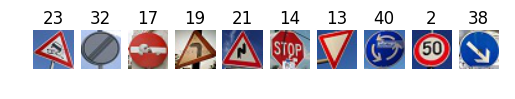

In [9]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import numpy as np
import matplotlib.pyplot as plt
import cv2
# Visualizations will be shown in the notebook.
%matplotlib inline

test_group=[]
Y_actual=[23,32,17,19,21,14,13,40,2,38]
str1="traffic-signs-data/test_pics/pic"
str3=".jpg"


fig = plt.figure()
for i in range(1,11):
    image=cv2.cvtColor(cv2.imread(str1+str(i)+str3),cv2.COLOR_BGR2RGB)
    dispimage = image.squeeze()
    a=fig.add_subplot(1,10,i)
    plt.imshow(dispimage)
    a.axis('off')
    a.set_title(str(Y_actual[i-1]))
    YUV=cv2.cvtColor(image,cv2.COLOR_RGB2YUV)
    Y=YUV[:,:,0]
    test_group.append(Y[:,:,np.newaxis])
    

test_group=np.asarray(test_group)

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:** Ten candidated with their labels are displayed above.
Difficultes: Donot enter sign has some stickers on it, Stop sign as well has stickers,Slippery road is tilted and Dangerous curve to the left is taken in transposed angle and is rusted out


In [6]:
### Run the predictions here.
### Feel free to use as many code cells as needed.
import tensorflow as tf
y_predicted=[]
logits_predicted=[]
y_pred=tf.argmax(logits,1)

print('If program run by loading model, sNet Code snippet along with the next snippet needs to be run to avoid errors')
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    for i in range(0,10):
        temp_y=sess.run(y_pred,feed_dict={x:(test_group[i]).reshape(1,32,32,1)})
        temp_logits=sess.run(logits,feed_dict={x:(test_group[i]).reshape(1,32,32,1)})
        logits_predicted.append(temp_logits)
        y_predicted.append(temp_y)

print('Predicted labels:')
print(y_predicted)
        

    

If program run by loading model, sNet Code snippet along with the next snippet needs to be run to avoid errors
Predicted labels:
[array([37]), array([32]), array([17]), array([4]), array([21]), array([14]), array([13]), array([40]), array([3]), array([40])]


### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:** Accuracy 60%(6/10) are predicted properly.
The accuracy on the new images collected from website is 60% while the accuracy on the test data set provided with the project was 97%. There is a huge discrepancy between the accuracy. Possible related causes are explained in answer to question 8


In [7]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    for i in range(0,10):
        smax_prob=sess.run(tf.nn.top_k(tf.constant(logits_predicted[i]), k=5))
        print('Soft max probability of test sample:',i+1)
        print(smax_prob)

Soft max probability of test sample: 1
TopKV2(values=array([[ 19.6383934 ,  13.86622524,  13.23382282,  12.4199934 ,
          7.89209938]], dtype=float32), indices=array([[37, 40,  0, 38, 29]], dtype=int32))
Soft max probability of test sample: 2
TopKV2(values=array([[ 31.46990013,  28.12059212,  25.8329792 ,  24.35177422,
         21.43578339]], dtype=float32), indices=array([[32, 42,  6, 39, 41]], dtype=int32))
Soft max probability of test sample: 3
TopKV2(values=array([[ 33.63829803,  19.04611397,  13.64285374,  13.59764576,
          8.45991516]], dtype=float32), indices=array([[17, 36, 12, 13,  6]], dtype=int32))
Soft max probability of test sample: 4
TopKV2(values=array([[ 19.11041451,  13.93249416,  13.57189465,   5.71252728,
          2.28685355]], dtype=float32), indices=array([[ 4, 21, 26, 37, 15]], dtype=int32))
Soft max probability of test sample: 5
TopKV2(values=array([[ 67.79792786,  59.43495178,  53.4362793 ,  46.90974426,
         45.20518112]], dtype=float32), indices

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:** Sample number 9(speed limit 50) and 10(keep right) though detected improperly have their probabilities higher i.e within top 5. This can bring the accuracy up by 80. Model is uncertain about samples 1(slippery road) and 4 (Dangerous curve to the left) they do not have their probabilities high.The Dangerous curve is transposed to a large extent and slippery road is tilted by more than 15 degree

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.